In [1]:
from __future__ import division, print_function, unicode_literals

%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.colors import ListedColormap
import seaborn as sns

import csv
import pandas as pd
import numpy as np  
from io import StringIO
from urllib import request

import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import preprocessing

np.random.seed(42)

In [2]:
#Import Data
df= pd.read_csv("/Users/stansonwu/Downloads/ISOM 672/Project/final.csv", sep=',')
W = df.copy()
FE = df.copy()
df = df.iloc[:,54:]

print(df)

        age  duration  campaign  pdays  previous  emp.var.rate  \
0      56.0     261.0       1.0  999.0       0.0           1.1   
1      57.0     149.0       1.0  999.0       0.0           1.1   
2      37.0     226.0       1.0  999.0       0.0           1.1   
3      40.0     151.0       1.0  999.0       0.0           1.1   
4      56.0     307.0       1.0  999.0       0.0           1.1   
...     ...       ...       ...    ...       ...           ...   
73091  32.0     459.0       1.0  999.0       0.0          -1.8   
73092  30.0     904.0       1.0  999.0       0.0          -1.8   
73093  31.0     191.0       1.0  999.0       1.0          -1.8   
73094  60.0     482.0       2.0  999.0       0.0          -1.8   
73095  80.0     213.0       3.0    6.0       4.0          -1.8   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0              93.994          -36.4      4.857       5191.0   
1              93.994          -36.4      4.857       5191.0   
2              

In [ ]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(), annot = True)
plt.show() #correlation matrix

In [ ]:
W = W.iloc[:,1:]
print(W)

In [ ]:
#Split data

X_W = W.iloc[:,:-1]
y_W = W.iloc[:,-1]

X_train_W, X_test_W, y_train_W, y_test_W = train_test_split(X_W, y_W, test_size=0.3, random_state=42)


Logistic Regression (Before Feature Engineering)

In [ ]:
%matplotlib inline                      
from sklearn import linear_model 
from sklearn.metrics import accuracy_score, f1_score, classification_report

#Training the Model

clf_W = linear_model.LogisticRegression(max_iter=200)
clf_W = clf_W.fit(X_train_W, y_train_W)

print('The weights of the attributes are:', clf_W.coef_)
print('The weights of the intercepts are:', clf_W.intercept_)

In [ ]:
y_pred_W = clf_W.predict(X_test_W)
y_pred_prob_W = clf_W.predict_proba(X_test_W)

print(classification_report(y_test_W, y_pred_W))

In [ ]:
#Cross Validation

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, precision_score, recall_score, classification_report

# performance of logistic regression
clf_lr_W = linear_model.LogisticRegression(max_iter=200)

# Accuracy
accuracy_regression_W = cross_val_score(clf_lr_W, X_W, y_W, cv = 5) 

# f1
f1_score_regression_W = cross_val_score(clf_lr_W, X_W, y_W, cv = 5, scoring = 'f1_macro') 

# precision
precision_regression_W = cross_val_score(clf_lr_W, X_W, y_W, cv = 5, scoring = 'precision') 

# recall
recall_regression_W = cross_val_score(clf_lr_W, X_W, y_W, cv = 5, scoring = 'recall') 

print("Performance of Logistic Regression\n")
print("Accuracy_regression: %0.2f (+/- %0.2f)" % (accuracy_regression_W.mean(), accuracy_regression_W.std()))
print("F1_score_regression: %0.2f (+/- %0.2f)" % (f1_score_regression_W.mean(), f1_score_regression_W.std()))
print("Precision_regression: %0.2f (+/- %0.2f)" % (precision_regression_W.mean(), precision_regression_W.std()))
print("Recall_regression: %0.2f (+/- %0.2f)" % (recall_regression_W.mean(), recall_regression_W.std()))

In [ ]:
################################# Nested Cross-Validation #################################

##################################### Parameter Tuning ####################################

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler

inner_cv = KFold(n_splits=5, shuffle=True) # inner cross-validation folds
outer_cv = KFold(n_splits=5, shuffle=True) # outer cross-validation folds

In [ ]:
############################ Logistic Regression Parameter Tuning ############################
#To ignore the convergence warnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
      
gs_lr2_W = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                              'penalty':['l1','l2']}],
                  scoring='f1_macro',
                  cv=inner_cv)

gs_lr2_W = gs_lr2_W.fit(X_W,y_W)
print("\n Parameter Tuning for Logistic Regression")
print("Non-nested CV Accuracy: ", gs_lr2_W.best_score_)
print("Optimal Parameter: ", gs_lr2_W.best_params_)
print("Optimal Estimator: ", gs_lr2_W.best_estimator_)
nested_score_gs_lr2_W = cross_val_score(gs_lr2_W, X=X_W, y=y_W, cv=outer_cv)
print("Nested CV Accuracy:",nested_score_gs_lr2_W.mean(), " +/- ", nested_score_gs_lr2_W.std())

In [ ]:
############################ Logistic Regression Parameter Tuning ############################
#To ignore the convergence warnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
      
gs_lr3_W = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                              'penalty':['l1','l2']}],
                  scoring='recall',
                  cv=inner_cv)

gs_lr3_W = gs_lr3_W.fit(X_W,y_W)
print("\n Parameter Tuning for Logistic Regression")
print("Non-nested CV Accuracy: ", gs_lr3_W.best_score_)
print("Optimal Parameter: ", gs_lr3_W.best_params_)
print("Optimal Estimator: ", gs_lr3_W.best_estimator_)
nested_score_gs_lr2_W = cross_val_score(gs_lr3_W, X=X_W, y=y_W, cv=outer_cv)
print("Nested CV Accuracy:",nested_score_gs_lr3_W.mean(), " +/- ", nested_score_gs_lr3_W.std())

K-NN (Before Feature Engineering)

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler 

sc_W = StandardScaler()
sc_W.fit(X_train_W)                                  

X_train_std_W = sc_W.transform(X_train_W) 
X_test_std_W = sc_W.transform(X_test_W)   

In [ ]:
from sklearn import neighbors

knn_W = neighbors.KNeighborsClassifier(n_neighbors=5,
                                     weights='distance',
                                     n_jobs=-1)

knn_W = knn_W.fit(X_train_std_W, y_train_W) 

In [ ]:
################################# KNN Regressor with Cross-Validation #################################

from sklearn.model_selection import cross_val_score

# Accuracy
accuracy_knn_W = cross_val_score(knn_W,X_train_std_W,y_train_W, cv = 5) 

# f1
f1_score_knn_W = cross_val_score(knn_W,X_train_std_W,y_train_W, cv = 5, scoring = 'f1_macro') 

# precision
precision_knn_W = cross_val_score(knn_W,X_train_std_W,y_train_W, cv = 5, scoring = 'precision') 

# recall
recall_knn_W = cross_val_score(knn_W,X_train_std_W,y_train_W, cv = 5, scoring = 'recall') 

print("Performance of Logistic Regression\n")
print("Accuracy_regression: %0.2f (+/- %0.2f)" % (accuracy_knn_W.mean(), accuracy_knn_W.std()))
print("F1_score_regression: %0.2f (+/- %0.2f)" % (f1_score_knn_W.mean(), f1_score_knn_W.std()))
print("Precision_regression: %0.2f (+/- %0.2f)" % (precision_knn_W.mean(), precision_knn_W.std()))
print("Recall_regression: %0.2f (+/- %0.2f)" % (recall_knn_W.mean(), recall_knn_W.std()))

In [ ]:
#Model Evaluation

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, classification_report


y_pred_W = knn_W.predict(X_test_std_W)
y_pred_insample_W = knn_W.predict(X_train_std_W)

#Accuracy, F1 score, Precision, Recall, Kappa score for out-of-sample (training dataset)
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test_W, y_pred_W))
print('F1 score (out-of-sample):', f1_score(y_test_W, y_pred_W, average='macro'))
print('Precision (out-of-sample):', precision_score(y_test_W, y_pred_W, average='macro'))
print('Recall (out-of-sample):', recall_score(y_test_W, y_pred_W, average='macro'))
print('Kappa score (out-of-sample):', cohen_kappa_score(y_test_W, y_pred_W))                

print('----------------------------------------------------------------------------')

#Accuracy, F1 score, Precision, Recall, Kappa score in-sample (test dataset)
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train_W, y_pred_insample_W))
print('F1 score (in-sample):', f1_score(y_train_W, y_pred_insample_W, average='macro'))
print('Precision (in-sample):', precision_score(y_train_W, y_pred_insample_W, average='macro'))
print('Recall (in-sample):', recall_score(y_train_W, y_pred_insample_W, average='macro'))
print('Kappa score (in-sample):', cohen_kappa_score(y_train_W, y_pred_insample_W))      

print('----------------------------------------------------------------------------')

#Text Report displaying the main classification metrics
print('Main Classification Metrics for out-of-sample performance:')
print(classification_report(y_test_W, y_pred_W))
print('----------------------------------------------------------------------------')

#Confusion Matrix
print('Confusion Matrix:')
sns.heatmap(confusion_matrix(y_test_W,y_pred_W),annot=True,fmt='d')

In [ ]:
error_rate_W = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_W,y_train_W)
 pred_i = knn.predict(X_test_W)
 error_rate_W.append(np.mean(pred_i != y_test_W))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate_W,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate_W),"at K =",error_rate_W.index(min(error_rate_W)))

In [ ]:
############################ K-NN Parameter Tuning ############################

from sklearn.neighbors import KNeighborsClassifier

knn2_optk_W = GridSearchCV(KNeighborsClassifier(), 
                         param_grid=[{'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'weights':['uniform','distance']}], 
                         cv=inner_cv,
                         scoring='f1_macro',              
                         n_jobs=-1)

knn2_optk_W.fit(X_W,y_W)

print(" Parameter Tuning for KNN Regressor")
print("Non-nested Performance: ", knn2_optk_W.best_score_)
print("Optimal Parameter: ", knn2_optk_W.best_params_)    
print("Optimal Estimator: ", knn2_optk_W.best_estimator_) 

nested_score_knn2_optk_W = cross_val_score(knn2_optk_W, X=X_W, y=y_W, cv=outer_cv)           
print("Nested CV Performance: ",nested_score_knn2_optk_W.mean(), " +/- ", nested_score_knn2_optk_W.std())

In [ ]:
############################ K-NN Parameter Tuning ############################

from sklearn.neighbors import KNeighborsClassifier

knn3_optk_W = GridSearchCV(KNeighborsClassifier(), 
                         param_grid=[{'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'weights':['uniform','distance']}], 
                         cv=inner_cv,
                         scoring='precision',              
                         n_jobs=-1)

knn3_optk_W.fit(X_W,y_W)

print(" Parameter Tuning for KNN Regressor")
print("Non-nested Performance: ", knn3_optk_W.best_score_)
print("Optimal Parameter: ", knn3_optk_W.best_params_)    
print("Optimal Estimator: ", knn3_optk_W.best_estimator_) 

nested_score_knn3_optk_W = cross_val_score(knn3_optk_W, X=X_W, y=y_W, cv=outer_cv)           
print("Nested CV Performance: ",nested_score_knn3_optk_W.mean(), " +/- ", nested_score_knn3_optk_W.std())

Decision Tree (Before Feature Engineering)

In [ ]:
#Build the decision tree 
tree = DecisionTreeClassifier(max_depth=5)
clf_W = tree.fit(X_train_W,y_train_W)
y1_pred_W = tree.predict(X_test_W)


In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(70, 30))

tree.plot_tree(clf_W.fit(X_train_W, y_train_W), 
               feature_names = W.columns, 
               filled = True,  
               rounded = True, 
               fontsize=12,
               max_depth = 5)
print('Decision Tree Visualization')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision:', precision_score(y_test_W, y1_pred_W))
print('Recall:', recall_score(y_test_W, y1_pred_W))
print('Accuracy:', accuracy_score(y_test_W, y1_pred_W))
print('F1 Score:', f1_score(y_test_W, y1_pred_W))

In [ ]:
################################# Decision Tree with Cross-Validation #################################

from sklearn.model_selection import cross_val_score

# Accuracy
accuracy_clf_W = cross_val_score(clf_W,X_train_W,y_train_W, cv = 5) 

# f1
f1_score_clf_W = cross_val_score(clf_W,X_train_W,y_train_W, cv = 5, scoring = 'f1_macro') 

# precision
precision_clf_W = cross_val_score(clf_W,X_train_W,y_train_W, cv = 5, scoring = 'precision') 

# recall
recall_clf_W = cross_val_score(clf_W,X_train_W,y_train_W, cv = 5, scoring = 'recall') 

print("Performance of Decision Tree\n")
print("Accuracy_decisiontree: %0.2f (+/- %0.2f)" % (accuracy_clf_W.mean(), accuracy_clf_W.std()))
print("F1_score_decisiontree: %0.2f (+/- %0.2f)" % (f1_score_clf_W.mean(), f1_score_clf_W.std()))
print("Precision_decisiontree: %0.2f (+/- %0.2f)" % (precision_clf_W.mean(), precision_clf_W.std()))
print("Recall_decisiontree: %0.2f (+/- %0.2f)" % (recall_clf_W.mean(), recall_clf_W.std()))

In [ ]:
######################################### Parameters Optimization #########################################

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

criterion = ['gini', 'entropy']
maxdepth = range(1,10)
    
    
parameters = dict(criterion = criterion, max_depth = maxdepth)

In [ ]:
clf_GS_W = GridSearchCV(clf, parameters, scoring='f1_macro')
clf_GS_W.fit(X_train,y_train)

print(" Parameter Tuning for Decision Tree")
print("Non-nested Performance: ", clf_GS_W.best_score_)
print("Optimal Parameter: ", clf_GS_W.best_params_)    
print("Optimal Estimator: ", clf_GS_W.best_estimator_) 

nested_score_clf_GS_W = cross_val_score(clf_GS_W, X=X_W, y=y_W, cv=outer_cv)           
print("Nested CV Performance: ",nested_score_clf_GS_W.mean(), " +/- ", nested_score_clf_GS_W.std())


In [ ]:
clf_GS2_W = GridSearchCV(clf, parameters, scoring='recall')
clf_GS2_W.fit(X_train,y_train)

print(" Parameter Tuning for Decision Tree")
print("Non-nested Performance: ", clf_GS2_W.best_score_)
print("Optimal Parameter: ", clf_GS2_W.best_params_)    
print("Optimal Estimator: ", clf_GS2_W.best_estimator_) 

nested_score_clf_GS2_W = cross_val_score(clf_GS2_W, X=X_W, y=y_W, cv=outer_cv)           
print("Nested CV Performance: ",nested_score_clf_GS2_W.mean(), " +/- ", nested_score_clf_GS2_W.std())

In [ ]:
###################################### Confusion Matrix #####################################

import itertools                                       

# Function that prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True` (see below for examples)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #devide absolute number of observations with sum across columns to get the relative percentage of observations
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)        #shows the confusion matrix in the console
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))                       #add tick marks to the confusion matrix
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'                          #choose format depending on whether the confusion matrix is normalizaed or not
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): # loop that adds the value to each cell of the confusion matrix
        plt.text(j, i, format(cm[i, j], fmt),                              # we reformat how the cell values are displayed accroding to the variable fmt we defined before
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test_W, y1_pred_W)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf_GS_W.classes_,
                      title='Confusion matrix')

plt.show()


Feature Engineering

In [3]:
################################# Feature Engineering #################################

FE['quarterly change of employment numbers'] = FE['emp.var.rate'] * FE['nr.employed']
del FE['emp.var.rate']
del FE['nr.employed']
del FE['term deposit subscription']
del FE['euribor3m']

FE['term deposit subscription'] = df['term deposit subscription']
FE = FE.iloc[:,1:]
print(FE)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0               0                0                 0              1   
1               0                0                 0              0   
2               0                0                 0              0   
3               1                0                 0              0   
4               0                0                 0              0   
...           ...              ...               ...            ...   
73091           0                1                 0              0   
73092           0                1                 0              0   
73093           0                1                 0              0   
73094           1                0                 0              0   
73095           0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
0                   0            0                  0             0   
1    

In [ ]:
A = FE.iloc[:,53:]
print(A)

In [ ]:
plt.figure(figsize=(30,18))
sns.heatmap(A.corr(), annot = True)
plt.show() #correlation matrix

In [6]:
#Split data

X = FE.iloc[:,:-1]
y = FE.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0               0                0                 0              1   
1               0                0                 0              0   
2               0                0                 0              0   
3               1                0                 0              0   
4               0                0                 0              0   
...           ...              ...               ...            ...   
73091           0                1                 0              0   
73092           0                1                 0              0   
73093           0                1                 0              0   
73094           1                0                 0              0   
73095           0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
0                   0            0                  0             0   
1    

Logistic Regression

In [5]:
%matplotlib inline                      
from sklearn import linear_model 
from sklearn.metrics import accuracy_score, f1_score, classification_report

#Training the Model

clf = linear_model.LogisticRegression(max_iter=200)
clf = clf.fit(X_train, y_train)

print('The weights of the attributes are:', clf.coef_)
print('The weights of the intercepts are:', clf.intercept_)

The weights of the attributes are: [[ 7.25975434e-02 -1.53157696e-01 -1.33004894e-02 -1.71180854e-03
  -1.95932860e-03  5.70781975e-02 -3.90701402e-03 -4.01716640e-02
   4.46378266e-02  2.61605194e-02  9.04445267e-03  2.03089969e-03
  -7.51502395e-03 -9.01611525e-02  9.69193903e-02 -1.90177492e-03
  -1.66875852e-02 -4.01061437e-02 -8.64444165e-02 -4.10468271e-02
   1.68654848e-04  3.14443143e-02  1.36165606e-01  1.38478367e-02
   1.14093447e-01 -1.16717405e-01 -3.46036271e-05 -2.61870360e-02
  -4.01638273e-03  2.75448577e-02  2.80591666e-02 -4.01638273e-03
  -2.67013449e-02  8.46590345e-02 -8.73175955e-02  5.26040698e-02
   4.77705467e-02  1.32814220e-03  1.03323046e-01  4.90679782e-02
   1.25774733e-01 -4.01625207e-01 -6.32172376e-02  5.77918860e-02
   2.45234807e-02 -2.86302950e-02 -9.32734701e-03 -1.06001793e-02
   3.01315681e-02  1.57676922e-02 -9.48195535e-02  8.77726225e-02
   4.38837000e-03  2.93096969e-03  6.62909538e-03 -1.93601334e-01
  -2.36537585e-03 -6.04557556e-02  2.5776

/Users/stansonwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
#Cross Validation

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, precision_score, recall_score, classification_report

# performance of logistic regression
clf_lr = linear_model.LogisticRegression(max_iter=200)

# Accuracy
accuracy_regression = cross_val_score(clf_lr, X, y, cv = 5) 

# f1
f1_score_regression = cross_val_score(clf_lr, X, y, cv = 5, scoring = 'f1_macro') 

# precision
precision_regression = cross_val_score(clf_lr, X, y, cv = 5, scoring = 'precision') 

# recall
recall_regression = cross_val_score(clf_lr, X, y, cv = 5, scoring = 'recall') 

print("Performance of Logistic Regression\n")
print("Accuracy_regression: %0.2f (+/- %0.2f)" % (accuracy_regression.mean(), accuracy_regression.std()))
print("F1_score_regression: %0.2f (+/- %0.2f)" % (f1_score_regression.mean(), f1_score_regression.std()))
print("Precision_regression: %0.2f (+/- %0.2f)" % (precision_regression.mean(), precision_regression.std()))
print("Recall_regression: %0.2f (+/- %0.2f)" % (recall_regression.mean(), recall_regression.std()))

In [ ]:
################################# Nested Cross-Validation #################################

##################################### Parameter Tuning ####################################

from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
# Pipeline of transforms with a final estimator
#from sklearn.pipeline import Pipeline

inner_cv = KFold(n_splits=5, shuffle=True) # inner cross-validation folds
outer_cv = KFold(n_splits=5, shuffle=True) # outer cross-validation folds

In [ ]:
############################ Logistic Regression Parameter Tuning ############################
#To ignore the convergence warnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
      
gs_lr2 = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                              'penalty':['l1','l2']}],
                  scoring='f1_macro',
                  cv=inner_cv)

gs_lr2 = gs_lr2.fit(X,y)
print("\n Parameter Tuning for Logistic Regression")
print("Non-nested CV Accuracy: ", gs_lr2.best_score_)
print("Optimal Parameter: ", gs_lr2.best_params_)
print("Optimal Estimator: ", gs_lr2.best_estimator_)
nested_score_gs_lr2 = cross_val_score(gs_lr2, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy:",nested_score_gs_lr2.mean(), " +/- ", nested_score_gs_lr2.std())
 

In [ ]:
############################ Logistic Regression Parameter Tuning ############################
#To ignore the convergence warnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
      
gs_lr3 = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                              'penalty':['l1','l2']}],
                  scoring='recall',
                  cv=inner_cv)

gs_lr3 = gs_lr3.fit(X,y)
print("\n Parameter Tuning for Logistic Regression")
print("Non-nested CV Accuracy: ", gs_lr3.best_score_)
print("Optimal Parameter: ", gs_lr3.best_params_)
print("Optimal Estimator: ", gs_lr3.best_estimator_)
nested_score_gs_lr3 = cross_val_score(gs_lr3, X=X, y=y, cv=outer_cv)
print("Nested CV Accuracy:",nested_score_gs_lr3.mean(), " +/- ", nested_score_gs_lr3.std())

K-NN

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
sc.fit(X_train)                                  

X_train_std = sc.transform(X_train) 
X_test_std = sc.transform(X_test)   

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=5,
                                     weights='distance',
                                     n_jobs=-1)

knn = knn.fit(X_train_std, y_train)  

In [ ]:
################################# KNN Regressor with Cross-Validation #################################

from sklearn.model_selection import cross_val_score

# Accuracy
accuracy_knn = cross_val_score(knn,X_train_std,y_train, cv = 5) 

# f1
f1_score_knn = cross_val_score(knn,X_train_std,y_train, cv = 5, scoring = 'f1_macro') 

# precision
precision_knn = cross_val_score(knn,X_train_std,y_train, cv = 5, scoring = 'precision') 

# recall
recall_knn = cross_val_score(knn,X_train_std,y_train, cv = 5, scoring = 'recall') 

print("Performance of Logistic Regression\n")
print("Accuracy_regression: %0.2f (+/- %0.2f)" % (accuracy_knn.mean(), accuracy_knn.std()))
print("F1_score_regression: %0.2f (+/- %0.2f)" % (f1_score_knn.mean(), f1_score_knn.std()))
print("Precision_regression: %0.2f (+/- %0.2f)" % (precision_knn.mean(), precision_knn.std()))
print("Recall_regression: %0.2f (+/- %0.2f)" % (recall_knn.mean(), recall_knn.std()))



In [ ]:
#Model Evaluation

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, classification_report


y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)

#Accuracy, F1 score, Precision, Recall, Kappa score for out-of-sample (training dataset)
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('F1 score (out-of-sample):', f1_score(y_test, y_pred, average='macro'))
print('Precision (out-of-sample):', precision_score(y_test, y_pred, average='macro'))
print('Recall (out-of-sample):', recall_score(y_test, y_pred, average='macro'))
print('Kappa score (out-of-sample):', cohen_kappa_score(y_test, y_pred))                

print('----------------------------------------------------------------------------')

#Accuracy, F1 score, Precision, Recall, Kappa score in-sample (test dataset)
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))
print('F1 score (in-sample):', f1_score(y_train, y_pred_insample, average='macro'))
print('Precision (in-sample):', precision_score(y_train, y_pred_insample, average='macro'))
print('Recall (in-sample):', recall_score(y_train, y_pred_insample, average='macro'))
print('Kappa score (in-sample):', cohen_kappa_score(y_train, y_pred_insample))      

print('----------------------------------------------------------------------------')

#Text Report displaying the main classification metrics
print('Main Classification Metrics for out-of-sample performance:')
print(classification_report(y_test, y_pred))
print('----------------------------------------------------------------------------')

#Confusion Matrix
print('Confusion Matrix:')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [ ]:
############################ K-NN Parameter Tuning ############################

from sklearn.neighbors import KNeighborsClassifier

knn2_optk = GridSearchCV(KNeighborsClassifier(), 
                         param_grid=[{'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'weights':['uniform','distance']}], 
                         cv=inner_cv,
                         scoring='f1_macro',              
                         n_jobs=-1)

knn2_optk.fit(X,y)

print(" Parameter Tuning for KNN Regressor")
print("Non-nested Performance: ", knn2_optk.best_score_)
print("Optimal Parameter: ", knn2_optk.best_params_)    
print("Optimal Estimator: ", knn2_optk.best_estimator_) 

nested_score_knn2_optk = cross_val_score(knn2_optk, X=X, y=y, cv=outer_cv)           
print("Nested CV Performance: ",nested_score_knn2_optk.mean(), " +/- ", nested_score_knn2_optk.std())

In [ ]:
############################ K-NN Parameter Tuning ############################

from sklearn.neighbors import KNeighborsClassifier

knn3_optk = GridSearchCV(KNeighborsClassifier(), 
                         param_grid=[{'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'weights':['uniform','distance']}], 
                         cv=inner_cv,
                         scoring='recall',              
                         n_jobs=-1)

knn3_optk.fit(X,y)

print(" Parameter Tuning for KNN Regressor")
print("Non-nested Performance: ", knn3_optk.best_score_)
print("Optimal Parameter: ", knn3_optk.best_params_)    
print("Optimal Estimator: ", knn3_optk.best_estimator_) 

nested_score_knn3_optk = cross_val_score(knn3_optk, X=X, y=y, cv=outer_cv)           
print("Nested CV Performance: ",nested_score_knn3_optk.mean(), " +/- ", nested_score_knn3_optk.std())

Decision Tree

In [26]:
#Build the decision tree 
tree = DecisionTreeClassifier(max_depth=5)
clf = tree.fit(X_train,y_train)
y1_pred = tree.predict(X_test)


Decision Tree Visualization


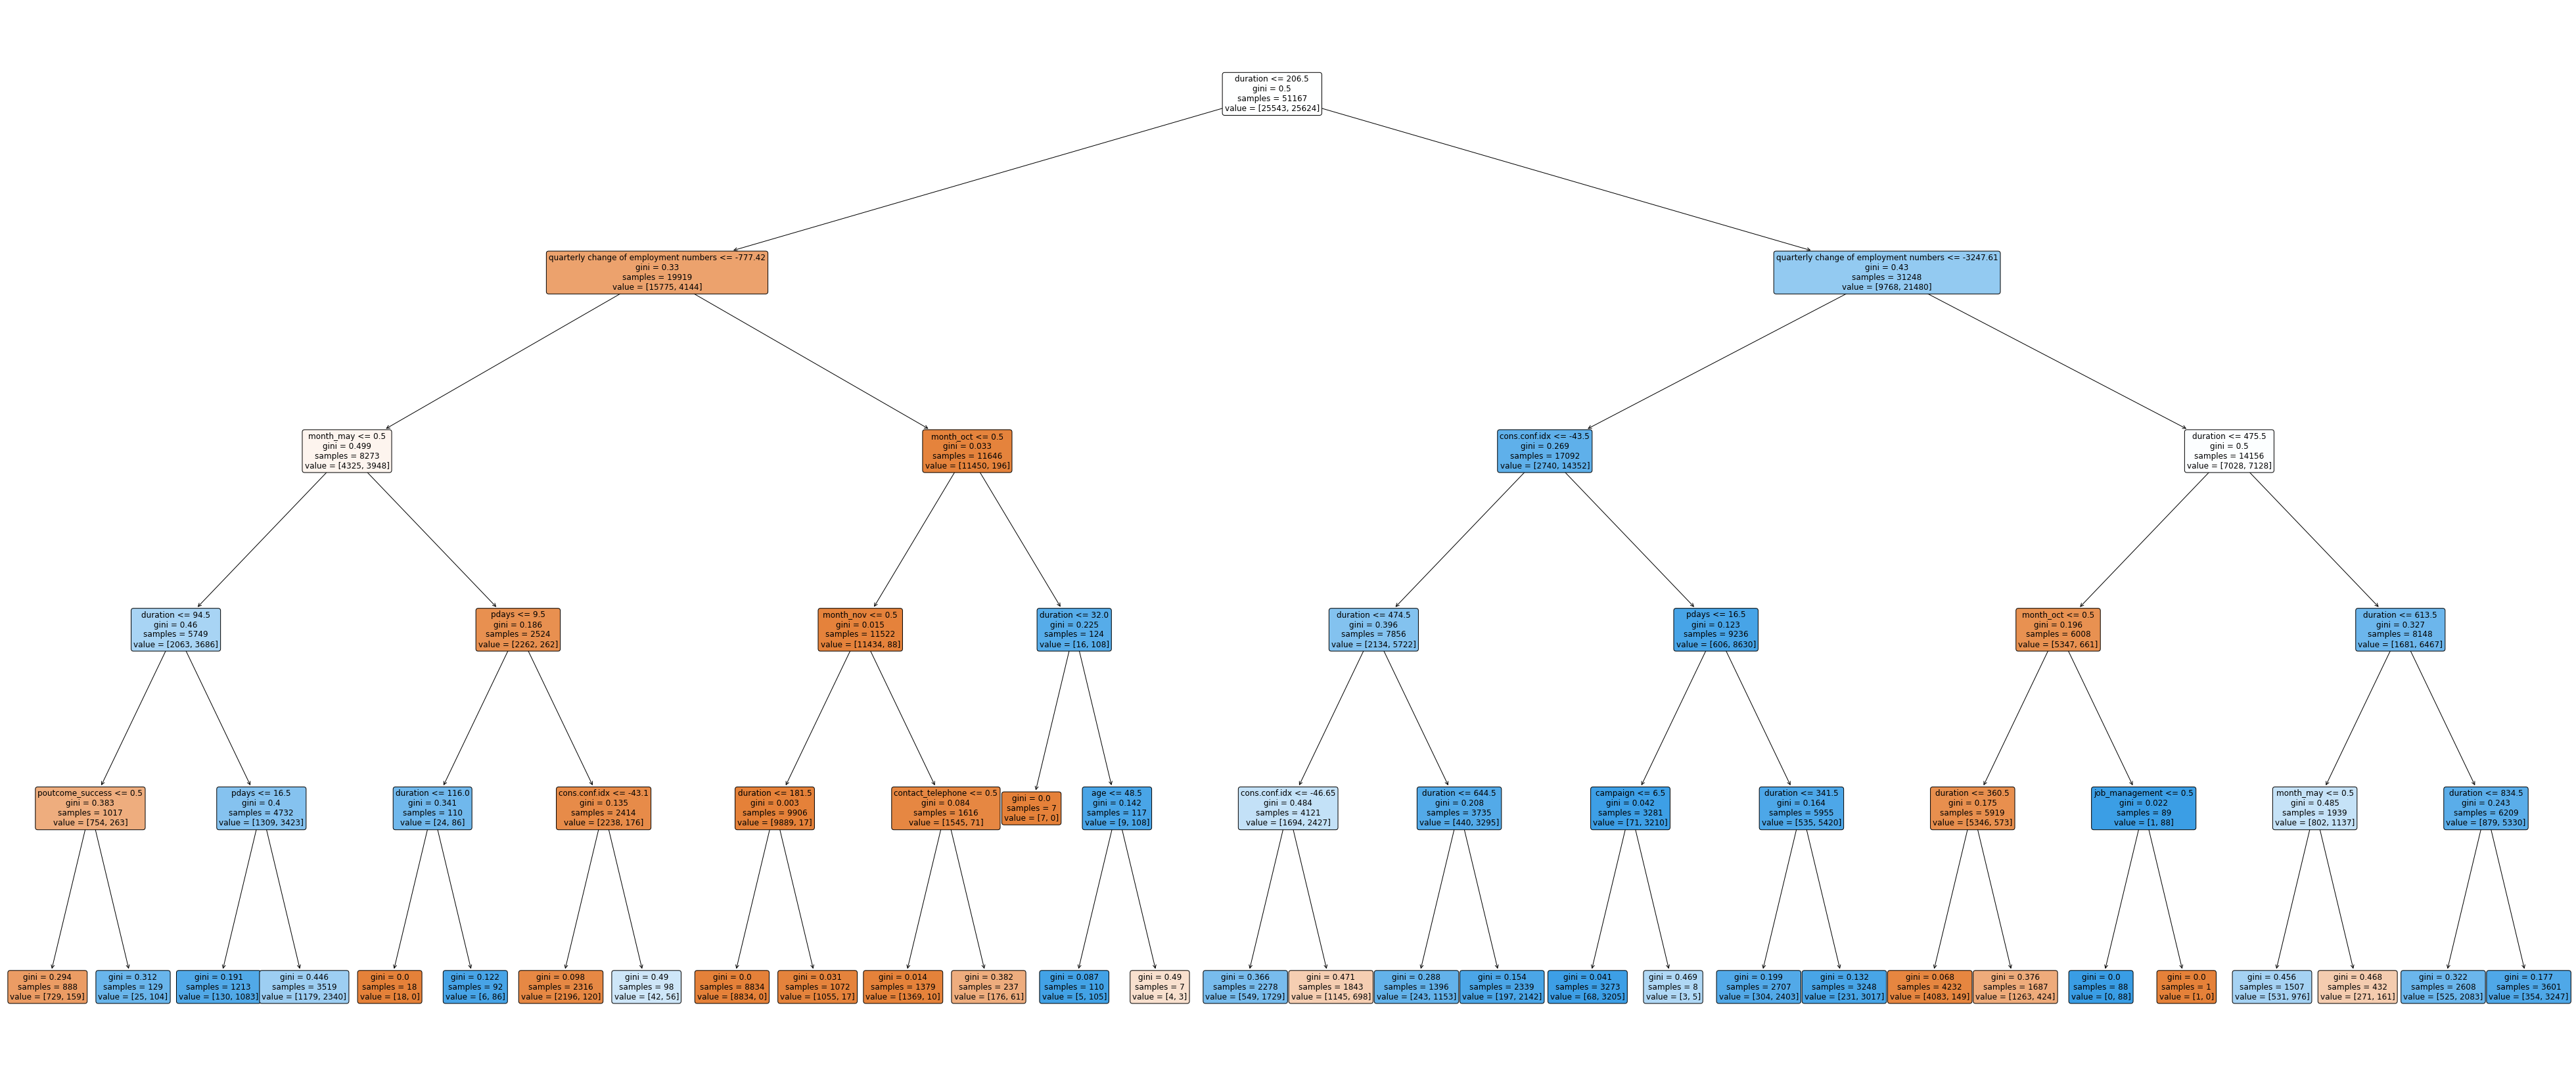

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(70, 30))

tree.plot_tree(clf.fit(X_train, y_train), 
               feature_names = FE.columns, 
               filled = True,  
               rounded = True, 
               fontsize=12,
               max_depth = 5)
print('Decision Tree Visualization')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision:', precision_score(y_test, y1_pred))
print('Recall:', recall_score(y_test, y1_pred))
print('Accuracy:', accuracy_score(y_test, y1_pred))
print('F1 Score:', f1_score(y_test, y1_pred))

In [ ]:
################################# Decision Tree with Cross-Validation #################################

from sklearn.model_selection import cross_val_score

# Accuracy
accuracy_clf = cross_val_score(clf,X_train,y_train, cv = 5) 

# f1
f1_score_clf = cross_val_score(clf,X_train,y_train, cv = 5, scoring = 'f1_macro') 

# precision
precision_clf = cross_val_score(clf,X_train,y_train, cv = 5, scoring = 'precision') 

# recall
recall_clf = cross_val_score(clf,X_train,y_train, cv = 5, scoring = 'recall') 

print("Performance of Decision Tree\n")
print("Accuracy_decisiontree: %0.2f (+/- %0.2f)" % (accuracy_clf.mean(), accuracy_clf.std()))
print("F1_score_decisiontree: %0.2f (+/- %0.2f)" % (f1_score_clf.mean(), f1_score_clf.std()))
print("Precision_decisiontree: %0.2f (+/- %0.2f)" % (precision_clf.mean(), precision_clf.std()))
print("Recall_decisiontree: %0.2f (+/- %0.2f)" % (recall_clf.mean(), recall_clf.std()))



In [ ]:
######################################### Parameters Optimization #########################################

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

criterion = ['gini', 'entropy']
maxdepth = range(1,10)
    
    
parameters = dict(criterion = criterion, max_depth = maxdepth)

In [ ]:
clf_GS = GridSearchCV(clf, parameters, scoring='f1_macro')
clf_GS.fit(X_train,y_train)

print(" Parameter Tuning for Decision Tree")
print("Non-nested Performance: ", clf_GS.best_score_)
print("Optimal Parameter: ", clf_GS.best_params_)    
print("Optimal Estimator: ", clf_GS.best_estimator_) 

nested_score_clf_GS = cross_val_score(clf_GS, X=X, y=y, cv=outer_cv)           
print("Nested CV Performance: ",nested_score_clf_GS.mean(), " +/- ", nested_score_clf_GS.std())


In [ ]:
clf_GS2 = GridSearchCV(clf, parameters, scoring='recall')
clf_GS2.fit(X_train,y_train)

print(" Parameter Tuning for Decision Tree")
print("Non-nested Performance: ", clf_GS2.best_score_)
print("Optimal Parameter: ", clf_GS2.best_params_)    
print("Optimal Estimator: ", clf_GS2.best_estimator_) 

nested_score_clf_GS2 = cross_val_score(clf_GS2, X=X, y=y, cv=outer_cv)           
print("Nested CV Performance: ",nested_score_clf_GS2.mean(), " +/- ", nested_score_clf_GS2.std())

In [ ]:
###################################### Confusion Matrix #####################################

import itertools                                       

# Function that prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True` (see below for examples)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #devide absolute number of observations with sum across columns to get the relative percentage of observations
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)        #shows the confusion matrix in the console
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))                       #add tick marks to the confusion matrix
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'                          #choose format depending on whether the confusion matrix is normalizaed or not
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): # loop that adds the value to each cell of the confusion matrix
        plt.text(j, i, format(cm[i, j], fmt),                              # we reformat how the cell values are displayed accroding to the variable fmt we defined before
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y1_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf_GS.classes_,
                      title='Confusion matrix')

plt.show()


In [ ]:
############################### Import Libraries & Modules #################################

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.pipeline import Pipeline

######################################## Classifiers ########################################
# Logistic Regression Classifier
clf1 = LogisticRegression(penalty='l1', 
                          C=1,
                          random_state=42, 
                          solver='liblinear') 

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(max_depth=9,
                              criterion='gini',
                              random_state=42)

# kNN Classifier

clf3 = Pipeline([
        ('sc', StandardScaler()),     
        ('knn', KNeighborsClassifier(n_neighbors=2,
                                     weights = 'distance')) 
      ])

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

#################################### Cross - Validation ####################################


print('5-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  # estimate AUC based on cross validation
                             X=X,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" # print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # colors for visualization
linestyles = [':', '--', '-.', '-']        # line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1] # make predictions based on the classifiers
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,       # build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                           # compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                                    # plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # where to place the legend
plt.plot([0, 1], [0, 1],         # visualize random classifier
         linestyle='--',         # aesthetic parameters
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

In [ ]:
#Confusion Matrix for the best performing model - k_NN
from sklearn import neighbors

knn_b = neighbors.KNeighborsClassifier(n_neighbors=2,
                                     weights='distance',
                                     n_jobs=-1)

knn_b = knn_b.fit(X_train_std, y_train)  

In [ ]:
#Model Evaluation

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, classification_report


y_pred_b = knn_b.predict(X_test_std)
y_pred_insample_b = knn_b.predict(X_train_std)

#Accuracy, F1 score, Precision, Recall, Kappa score for out-of-sample (training dataset)
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred_b))
print('F1 score (out-of-sample):', f1_score(y_test, y_pred_b, average='macro'))
print('Precision (out-of-sample):', precision_score(y_test, y_pred_b, average='macro'))
print('Recall (out-of-sample):', recall_score(y_test, y_pred_b, average='macro'))
print('Kappa score (out-of-sample):', cohen_kappa_score(y_test, y_pred_b))                

print('----------------------------------------------------------------------------')

#Accuracy, F1 score, Precision, Recall, Kappa score in-sample (test dataset)
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample_b))
print('F1 score (in-sample):', f1_score(y_train, y_pred_insample_b, average='macro'))
print('Precision (in-sample):', precision_score(y_train, y_pred_insample_b, average='macro'))
print('Recall (in-sample):', recall_score(y_train, y_pred_insample_b, average='macro'))
print('Kappa score (in-sample):', cohen_kappa_score(y_train, y_pred_insample_b))      

print('----------------------------------------------------------------------------')

#Text Report displaying the main classification metrics
print('Main Classification Metrics for out-of-sample performance:')
print(classification_report(y_test, y_pred_b))
print('----------------------------------------------------------------------------')

#Confusion Matrix
print('Confusion Matrix:')
sns.heatmap(confusion_matrix(y_test,y_pred_b),annot=True,fmt='d')